# **Imports**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/working/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# **//Start of code**

#  **//1-Pre-Processing**

# **Load the training dataset from Kaggle and display the first few rows**

In [8]:
train_path = "/kaggle/input/playground-series-s5e2/train.csv"  

# Read the CSV file
traindata = pd.read_csv(train_path)

# Display the first few rows
print(traindata.head())

   id         Brand Material    Size  Compartments Laptop Compartment  \
0   0      Jansport  Leather  Medium           7.0                Yes   
1   1      Jansport   Canvas   Small          10.0                Yes   
2   2  Under Armour  Leather   Small           2.0                Yes   
3   3          Nike    Nylon   Small           8.0                Yes   
4   4        Adidas   Canvas  Medium           1.0                Yes   

  Waterproof      Style  Color  Weight Capacity (kg)      Price  
0         No       Tote  Black             11.611723  112.15875  
1        Yes  Messenger  Green             27.078537   68.88056  
2         No  Messenger    Red             16.643760   39.17320  
3         No  Messenger  Green             12.937220   80.60793  
4        Yes  Messenger  Green             17.749338   86.02312  


# **Analyze a CSV file to summarize unique values and missing entries for each column**

In [20]:
# Reads a CSV file and prints distinct elements and empty cell counts for each column.
def analyze_csv_columns(file_path):
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Iterate over all columns and print distinct elements and empty cells
        for column in df.columns:
            distinct_elements = df[column].dropna().unique()
            empty_cells = df[column].isna().sum()

            print(f"Column: {column}")
            print(f"Distinct elements ({len(distinct_elements)}): {distinct_elements}")
            print(f"Empty cells: {empty_cells}")
            print("-" * 40)

In [250]:
analyze_csv_columns(train_path)

Column: id
Distinct elements (300000): [     0      1      2 ... 299997 299998 299999]
Empty cells: 0
----------------------------------------
Column: Brand
Distinct elements (5): ['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma']
Empty cells: 9705
----------------------------------------
Column: Material
Distinct elements (4): ['Leather' 'Canvas' 'Nylon' 'Polyester']
Empty cells: 8347
----------------------------------------
Column: Size
Distinct elements (3): ['Medium' 'Small' 'Large']
Empty cells: 6595
----------------------------------------
Column: Compartments
Distinct elements (10): [ 7. 10.  2.  8.  1.  3.  5.  9.  6.  4.]
Empty cells: 0
----------------------------------------
Column: Laptop Compartment
Distinct elements (2): ['Yes' 'No']
Empty cells: 7444
----------------------------------------
Column: Waterproof
Distinct elements (2): ['No' 'Yes']
Empty cells: 7050
----------------------------------------
Column: Style
Distinct elements (3): ['Tote' 'Messenger' 'Backpack']


# **Preprocess dataset by mapping categorical columns to numeric values, filling missing data, and normalizing numerical features**

In [9]:
from sklearn.preprocessing import MinMaxScaler
def preprocess_columns(df):
    # Brand Mapping
    brand_mapping = {
        'Adidas': 0, 'Jansport': 1, 'Nike': 2, 'Puma': 3, 'Under Armour': 4
    }
    df['Brand'] = df['Brand'].map(brand_mapping).fillna(5)

    # Material Mapping
    material_mapping = {
        'Canvas': 0, 'Leather': 1, 'Nylon': 2, 'Polyester': 3
    }
    df['Material'] = df['Material'].map(material_mapping).fillna(4)

     # Size Mapping
    size_mapping = {
        'Large': 0, 'Medium': 1, 'Small': 2
    }
    df['Size'] = df['Size'].map(size_mapping).fillna(df['Size'].mode()[0])
    
    # Laptop Compartment Mapping
    laptop_compartment_mapping = {
        'Yes': 1, 'No': 0
    }
    df['Laptop Compartment'] = df['Laptop Compartment'].map(laptop_compartment_mapping).fillna(2)

    # Weight Capacity (kg) - Fill missing values with average
    average_weight_capacity = df['Weight Capacity (kg)'].mean()
    df['Weight Capacity (kg)'] = df['Weight Capacity (kg)'].fillna(average_weight_capacity)

    # Normalize 'Weight Capacity (kg)' using StandardScaler
    scaler = MinMaxScaler()
    df['Weight Capacity (kg)'] = scaler.fit_transform(df[['Weight Capacity (kg)']])

    # Color Mapping
    color_mapping = {
        'Black': 0, 'Green': 1, 'Red': 2, 'Blue': 3, 'Gray': 4, 'Pink': 5
    }
    df['Color'] = df['Color'].map(color_mapping).fillna(6)

    # Style Mapping
    style_mapping = {
        'Tote': 0, 'Messenger': 1, 'Backpack': 2
    }
    df['Style'] = df['Style'].map(style_mapping).fillna(3)

    # Waterproof Mapping
    waterproof_mapping = {
        'Yes': 1, 'No': 0
    }
    df['Waterproof'] = df['Waterproof'].map(waterproof_mapping).fillna(2)
    
    return df

#Load your CSV file
traindata = pd.read_csv(train_path)

# Apply all column processing
traindata = preprocess_columns(traindata)

# Save the modified dataset
traindata.to_csv("processed_file.csv", index=False)

print("All columns processed successfully!")

All columns processed successfully!


In [252]:
preprocessed_path="/kaggle/working/processed_file.csv"

analyze_csv_columns(preprocessed_path)

Column: id
Distinct elements (300000): [     0      1      2 ... 299997 299998 299999]
Empty cells: 0
----------------------------------------
Column: Brand
Distinct elements (6): [1. 4. 2. 0. 3. 5.]
Empty cells: 0
----------------------------------------
Column: Material
Distinct elements (5): [1. 0. 2. 4. 3.]
Empty cells: 0
----------------------------------------
Column: Size
Distinct elements (4): ['1.0' '2.0' '0.0' 'Medium']
Empty cells: 0
----------------------------------------
Column: Compartments
Distinct elements (10): [ 7. 10.  2.  8.  1.  3.  5.  9.  6.  4.]
Empty cells: 0
----------------------------------------
Column: Laptop Compartment
Distinct elements (3): [1. 0. 2.]
Empty cells: 0
----------------------------------------
Column: Waterproof
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Style
Distinct elements (4): [0. 1. 3. 2.]
Empty cells: 0
----------------------------------------
Column: Color
Distinct elements (7

# **Standardize 'Size' column by converting all 'Medium' entries to a consistent numeric value and update the dataset**

In [10]:
def fix_medium(df):
    # Convert 'Size' column to string first (if not already)
    df['Size'] = df['Size'].astype(str).apply(lambda x: '1.0' if x.strip().lower() == 'medium' else x)
    
    # Convert back to float if needed
    df['Size'] = df['Size'].astype(float)
    
    return df

#Load your CSV file
preprocessed_data = pd.read_csv(preprocessed_path)

# Now apply this function to the 'Size' column
preprocessed_data = fix_medium(preprocessed_data)

# Verify the mapping and check the distinct values again
print(preprocessed_data['Size'].unique())

# Save the modified dataset
preprocessed_data.to_csv("processed_file.csv", index=False)


[1. 2. 0.]


In [254]:
preprocessed_path="/kaggle/working/processed_file.csv"

analyze_csv_columns(preprocessed_path)

Column: id
Distinct elements (300000): [     0      1      2 ... 299997 299998 299999]
Empty cells: 0
----------------------------------------
Column: Brand
Distinct elements (6): [1. 4. 2. 0. 3. 5.]
Empty cells: 0
----------------------------------------
Column: Material
Distinct elements (5): [1. 0. 2. 4. 3.]
Empty cells: 0
----------------------------------------
Column: Size
Distinct elements (3): [1. 2. 0.]
Empty cells: 0
----------------------------------------
Column: Compartments
Distinct elements (10): [ 7. 10.  2.  8.  1.  3.  5.  9.  6.  4.]
Empty cells: 0
----------------------------------------
Column: Laptop Compartment
Distinct elements (3): [1. 0. 2.]
Empty cells: 0
----------------------------------------
Column: Waterproof
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Style
Distinct elements (4): [0. 1. 3. 2.]
Empty cells: 0
----------------------------------------
Column: Color
Distinct elements (7): [0. 1. 2. 3. 4.


# **Visualize feature distributions and correlations: plot histograms for 'Weight Capacity' and 'Price', and display a heatmap of correlations to understand relationships with the target variable**


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


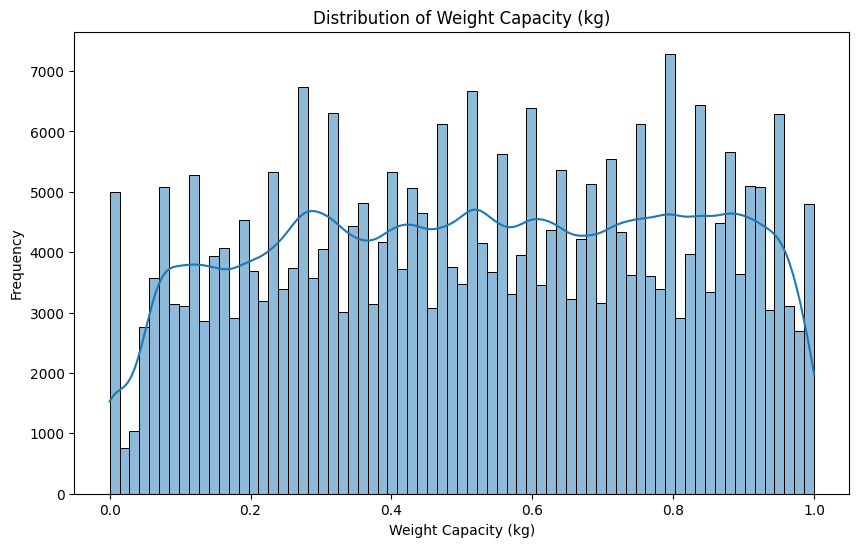

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


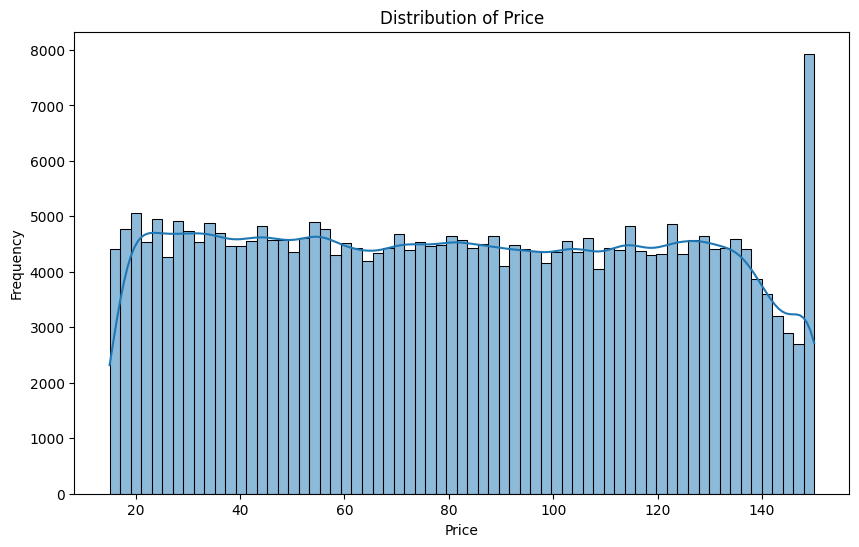

id                      0.002027
Brand                   0.007197
Material                0.002190
Size                   -0.002400
Compartments           -0.000131
Laptop Compartment     -0.003643
Waterproof             -0.007149
Style                   0.001132
Color                   0.002812
Weight Capacity (kg)    0.018013
Price                   1.000000
Name: Price, dtype: float64


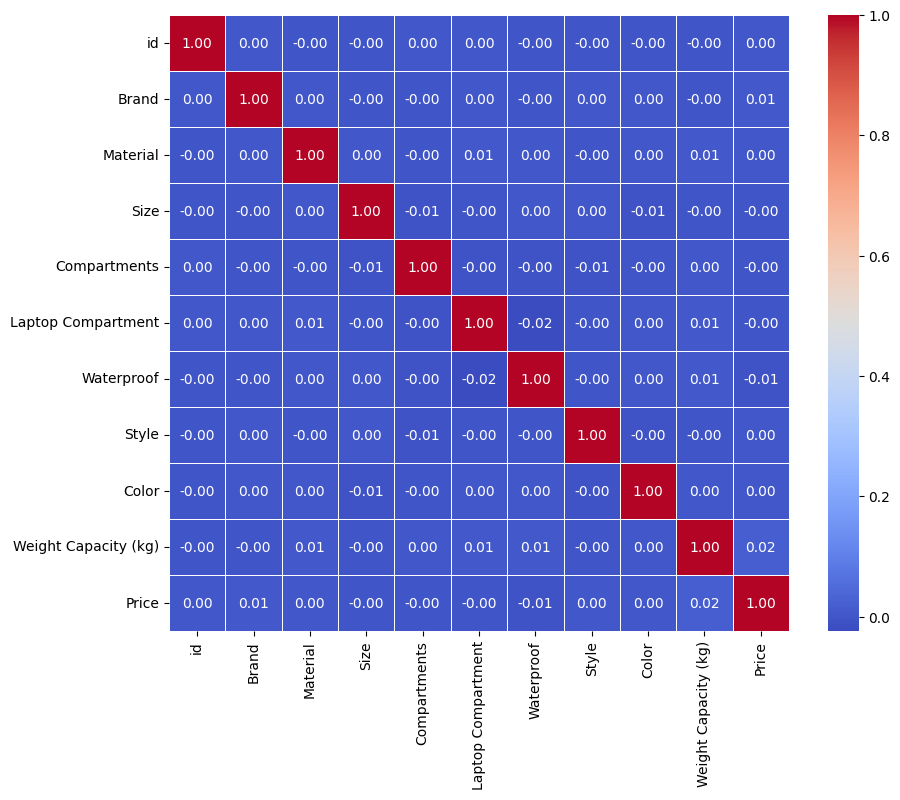

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#Load your CSV file
preprocessed_data = pd.read_csv(preprocessed_path)

# Distribution of 'Weight Capacity (kg)'
plt.figure(figsize=(10, 6))
sns.histplot(preprocessed_data['Weight Capacity (kg)'], kde=True)
plt.title('Distribution of Weight Capacity (kg)')
plt.xlabel('Weight Capacity (kg)')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(preprocessed_data['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

correlation_matrix = preprocessed_data.corr()

# Print correlation with Price
print(correlation_matrix['Price'])

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


# **Set up machine learning environment: import libraries for modeling, metrics, and data preprocessing, and load the processed dataset for training and evaluation**


In [256]:
#ML
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score,f1_score, confusion_matrix

In [257]:
# Load your data
df = pd.read_csv("/kaggle/working/processed_file.csv")

# **//2-FUll Features**

**Define feature columns (X) and target variable (y) for predicting backpack prices**

In [162]:
# Features and target
X = df[['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)']]
y = df['Price']

In [163]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **2.1-KNN Regression Model with full features** 

In [91]:
# Standardize the features (for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
# KNN Regression Model
knn = KNeighborsRegressor(n_neighbors=20) 
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=20)

In [99]:
# Predict and evaluate
y_pred_knn = knn.predict(X_test_scaled)
print(f"KNN Regression R2 Score: {r2_score(y_test, y_pred_knn)}")
print(f"KNN Regression MSE: {mean_squared_error(y_test, y_pred_knn)}")
print(f"KNN Regression MAE: {mean_absolute_error(y_test, y_pred_knn)}")
print(f"KNN Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")
print(f"KNN Regression Explained Variance: {explained_variance_score(y_test, y_pred_knn)}")


KNN Regression R2 Score: -0.04792986212735317
KNN Regression MSE: 1589.3071434545675
KNN Regression MAE: 34.196744879133334
KNN Regression RMSE: 39.86611522903338
KNN Regression Explained Variance: -0.04789610544220002


# **2.2-Decision Tree Regression Model with full features**

In [93]:
# Decision Tree Regression Model
tree = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=25)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=25)

In [95]:
# Predict and evaluate
y_pred_tree = tree.predict(X_test)
print(f"Decision Tree R2 Score: {r2_score(y_test, y_pred_tree)}")
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_tree)}")
print(f"Decision Tree MAE: {mean_absolute_error(y_test, y_pred_tree)}")
print(f"Decision Tree RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree))}")
print(f"Decision Tree Explained Variance: {explained_variance_score(y_test, y_pred_tree)}")

Decision Tree R2 Score: 0.0005593726903934115
Decision Tree MSE: 1515.767596523396
Decision Tree MAE: 33.65387801446774
Decision Tree RMSE: 38.93286011229326
Decision Tree Explained Variance: 0.0005837331516405087


In [165]:
# model = DecisionTreeRegressor(random_state=42)

# Initialize RFE with the model
selector = RFE(estimator=model, n_features_to_select=5)  
selector.fit(X, y)

# Get the ranking of features
ranking = selector.ranking_
selected_features = X.columns[selector.support_]

# Show the selected features
print(f"Selected features: {selected_features}")


Selected features: Index(['Size', 'Compartments', 'Laptop Compartment', 'Style',
       'Weight Capacity (kg)'],
      dtype='object')


# **//3-Selected Features**

In [272]:
# Selected features
X_selected = df[['Weight Capacity (kg)','Brand']]
y = df['Price']

In [273]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# **3.1-KNN Regression Model with selected features** 

In [276]:
# Standardize the features (for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [297]:
# KNN Regression Model
knn = KNeighborsRegressor(n_neighbors=350) 
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=350)

In [298]:
# Predict and evaluate
y_pred_knn = knn.predict(X_test_scaled)
print(f"KNN Regression R2 Score: {r2_score(y_test, y_pred_knn)}")
print(f"KNN Regression MSE: {mean_squared_error(y_test, y_pred_knn)}")
print(f"KNN Regression MAE: {mean_absolute_error(y_test, y_pred_knn)}")
print(f"KNN Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn))}")
print(f"KNN Regression Explained Variance: {explained_variance_score(y_test, y_pred_knn)}")

KNN Regression R2 Score: -0.0011763062946339442
KNN Regression MSE: 1518.3999549562857
KNN Regression MAE: 33.674213645532376
KNN Regression RMSE: 38.966651831486445
KNN Regression Explained Variance: -0.0011577645560665317


In [237]:
# Load your data
df_test = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
df_test=preprocess_columns(df_test)
df_test = fix_medium(df_test)
# Save the modified dataset
df_test.to_csv("test_file.csv", index=False)


test_path="/kaggle/working/test_file.csv"
analyze_csv_columns(test_path)
test_data = pd.read_csv("/kaggle/working/test_file.csv")
Z_test = test_data[['Weight Capacity (kg)','Color','Brand','Material']]

# Make predictions on the test set
y_pred_knn = knn.predict(Z_test)

# Create a DataFrame with 'id' and the predicted 'Price'
output = pd.DataFrame({'id': df_test['id'], 'Price': y_pred_knn})

# Save the DataFrame to a CSV file
output.to_csv('test_predictions_knn_Final.csv', index=False)

print("Output saved to 'test_predictions_knn_Final.csv'")

Column: id
Distinct elements (200000): [300000 300001 300002 ... 499997 499998 499999]
Empty cells: 0
----------------------------------------
Column: Brand
Distinct elements (6): [3. 2. 0. 5. 4. 1.]
Empty cells: 0
----------------------------------------
Column: Material
Distinct elements (5): [1. 0. 2. 3. 4.]
Empty cells: 0
----------------------------------------
Column: Size
Distinct elements (3): [2. 1. 0.]
Empty cells: 0
----------------------------------------
Column: Compartments
Distinct elements (10): [ 2.  7.  9.  1.  8.  6.  5.  3. 10.  4.]
Empty cells: 0
----------------------------------------
Column: Laptop Compartment
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Waterproof
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Style
Distinct elements (4): [0. 2. 1. 3.]
Empty cells: 0
----------------------------------------
Column: Color
Distinct elements (7): [1. 3. 0. 2. 5.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but KNeighborsRegressor is expecting 4 features as input.

# **3.2-Decision Tree Regression Model with selected features**

In [143]:
# Decision Tree Regression Model
tree = DecisionTreeRegressor(max_depth=3,min_samples_split=20,min_samples_leaf=20, random_state=25)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=20, min_samples_split=20,
                      random_state=25)

In [144]:
# Predict and evaluate
y_pred_tree = tree.predict(X_test)
print(f"Decision Tree R2 Score: {r2_score(y_test, y_pred_tree)}")
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_tree)}")
print(f"Decision Tree MAE: {mean_absolute_error(y_test, y_pred_tree)}")
print(f"Decision Tree RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree))}")
print(f"Decision Tree Explained Variance: {explained_variance_score(y_test, y_pred_tree)}")

Decision Tree R2 Score: 0.0007668613714209016
Decision Tree MSE: 1514.8865235147186
Decision Tree MAE: 33.67306600614555
Decision Tree RMSE: 38.92154318002716
Decision Tree Explained Variance: 0.0007675828473279189


In [145]:
# Load your data
df_test = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
df_test=preprocess_columns(df_test)
df_test = fix_medium(df_test)
# Save the modified dataset
df_test.to_csv("test_file.csv", index=False)


test_path="/kaggle/working/test_file.csv"
analyze_csv_columns(test_path)
test_data = pd.read_csv("/kaggle/working/test_file.csv")
Z_test = test_data[['Weight Capacity (kg)']]

# Make predictions on the test set
y_pred_tree = tree.predict(Z_test)

# Create a DataFrame with 'id' and the predicted 'Price'
output = pd.DataFrame({'id': df_test['id'], 'Price': y_pred_tree})

# Save the DataFrame to a CSV file
output.to_csv('test_predictions_DT_onlyweight.csv', index=False)

print("Output saved to 'test_predictions_DT_onlyweight.csv'")

Column: id
Distinct elements (200000): [300000 300001 300002 ... 499997 499998 499999]
Empty cells: 0
----------------------------------------
Column: Brand
Distinct elements (6): [3. 2. 0. 5. 4. 1.]
Empty cells: 0
----------------------------------------
Column: Material
Distinct elements (5): [1. 0. 2. 3. 4.]
Empty cells: 0
----------------------------------------
Column: Size
Distinct elements (3): [2. 1. 0.]
Empty cells: 0
----------------------------------------
Column: Compartments
Distinct elements (10): [ 2.  7.  9.  1.  8.  6.  5.  3. 10.  4.]
Empty cells: 0
----------------------------------------
Column: Laptop Compartment
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Waterproof
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Style
Distinct elements (4): [0. 2. 1. 3.]
Empty cells: 0
----------------------------------------
Column: Color
Distinct elements (7): [1. 3. 0. 2. 5.

# **3.3-XGBoost with selected features**

In [299]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=75, random_state=42)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
print(f"XGBoost R2 Score: {r2_score(y_test, y_pred_xgb)}")
print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"XGBoost RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}")
print(f"XGBoost Explained Variance: {explained_variance_score(y_test, y_pred_xgb)}")

XGBoost R2 Score: -0.0015978885093637096
XGBoost MSE: 1519.0393332674098
XGBoost MAE: 33.686238948311036
XGBoost RMSE: 38.97485514107024
XGBoost Explained Variance: -0.0015742932416409339


In [228]:
# Load your data
df_test = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
df_test=preprocess_columns(df_test)
df_test = fix_medium(df_test)
# Save the modified dataset
df_test.to_csv("test_file.csv", index=False)


test_path="/kaggle/working/test_file.csv"
analyze_csv_columns(test_path)
test_data = pd.read_csv("/kaggle/working/test_file.csv")
Z_test = test_data[['Weight Capacity (kg)','Color','Brand','Material']]

# Make predictions on the test set
y_pred_XG = model.predict(Z_test)

# Create a DataFrame with 'id' and the predicted 'Price'
output = pd.DataFrame({'id': df_test['id'], 'Price': y_pred_XG})

# Save the DataFrame to a CSV file
output.to_csv('test_predictions_XG1_Final.csv', index=False)

print("Output saved to 'test_predictions_XG1_Final.csv'")

Column: id
Distinct elements (200000): [300000 300001 300002 ... 499997 499998 499999]
Empty cells: 0
----------------------------------------
Column: Brand
Distinct elements (6): [3. 2. 0. 5. 4. 1.]
Empty cells: 0
----------------------------------------
Column: Material
Distinct elements (5): [1. 0. 2. 3. 4.]
Empty cells: 0
----------------------------------------
Column: Size
Distinct elements (3): [2. 1. 0.]
Empty cells: 0
----------------------------------------
Column: Compartments
Distinct elements (10): [ 2.  7.  9.  1.  8.  6.  5.  3. 10.  4.]
Empty cells: 0
----------------------------------------
Column: Laptop Compartment
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Waterproof
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Style
Distinct elements (4): [0. 2. 1. 3.]
Empty cells: 0
----------------------------------------
Column: Color
Distinct elements (7): [1. 3. 0. 2. 5.

# **3.4-LightGBM with selected features**

In [229]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Initialize the LightGBM model
model = lgb.LGBMRegressor(n_estimators=75, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = model.predict(X_test)

# Evaluate the model
print(f"LightGBM R2 Score: {r2_score(y_test, y_pred_lgbm)}")
print(f"LightGBM MSE: {mean_squared_error(y_test, y_pred_lgbm)}")
print(f"LightGBM MAE: {mean_absolute_error(y_test, y_pred_lgbm)}")
print(f"LightGBM RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lgbm))}")
print(f"LightGBM Explained Variance: {explained_variance_score(y_test, y_pred_lgbm)}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 273
[LightGBM] [Info] Number of data points in the train set: 2955454, number of used features: 4
[LightGBM] [Info] Start training from score 81.351552
LightGBM R2 Score: 0.0017157748522255156
LightGBM MSE: 1513.4479240643186
LightGBM MAE: 33.65038273559082
LightGBM RMSE: 38.903058029727156
LightGBM Explained Variance: 0.001716658320236486


In [230]:
# Load your data
df_test = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
df_test=preprocess_columns(df_test)
df_test = fix_medium(df_test)
# Save the modified dataset
df_test.to_csv("test_file.csv", index=False)


test_path="/kaggle/working/test_file.csv"
analyze_csv_columns(test_path)
test_data = pd.read_csv("/kaggle/working/test_file.csv")
Z_test = test_data[['Weight Capacity (kg)','Color','Brand','Material']]

# Make predictions on the test set
y_pred_XG = model.predict(Z_test)

# Create a DataFrame with 'id' and the predicted 'Price'
output = pd.DataFrame({'id': df_test['id'], 'Price': y_pred_XG})

# Save the DataFrame to a CSV file
output.to_csv('test_predictions_LGB_Final.csv', index=False)

print("Output saved to 'test_predictions_LGB_Final.csv'")

Column: id
Distinct elements (200000): [300000 300001 300002 ... 499997 499998 499999]
Empty cells: 0
----------------------------------------
Column: Brand
Distinct elements (6): [3. 2. 0. 5. 4. 1.]
Empty cells: 0
----------------------------------------
Column: Material
Distinct elements (5): [1. 0. 2. 3. 4.]
Empty cells: 0
----------------------------------------
Column: Size
Distinct elements (3): [2. 1. 0.]
Empty cells: 0
----------------------------------------
Column: Compartments
Distinct elements (10): [ 2.  7.  9.  1.  8.  6.  5.  3. 10.  4.]
Empty cells: 0
----------------------------------------
Column: Laptop Compartment
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Waterproof
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Style
Distinct elements (4): [0. 2. 1. 3.]
Empty cells: 0
----------------------------------------
Column: Color
Distinct elements (7): [1. 3. 0. 2. 5.

# **//4-Amplificated** 

# **Amplify features with interactions and polynomial transformations, scale selected columns,and visualize correlations with Price using a heatmap**

id                                   0.002027
Brand                                0.007197
Material                             0.002190
Size                                -0.002400
Compartments                        -0.000131
Laptop Compartment                  -0.003643
Waterproof                          -0.007149
Style                                0.001132
Color                                0.002812
Weight Capacity (kg)                 0.018013
Price                                1.000000
Weight_Brand                         0.015431
Weight_Color                         0.011640
Weight_Size                          0.005737
Weight_LaptopCompartment             0.004823
Weight_Log                           0.019389
Weight_Square                        0.013605
Weight_Cube                          0.010769
Weight Capacity (kg)^2               0.013605
Weight Capacity (kg) Brand           0.015431
Weight Capacity (kg) Material        0.011658
Weight Capacity (kg) Weight_Brand 

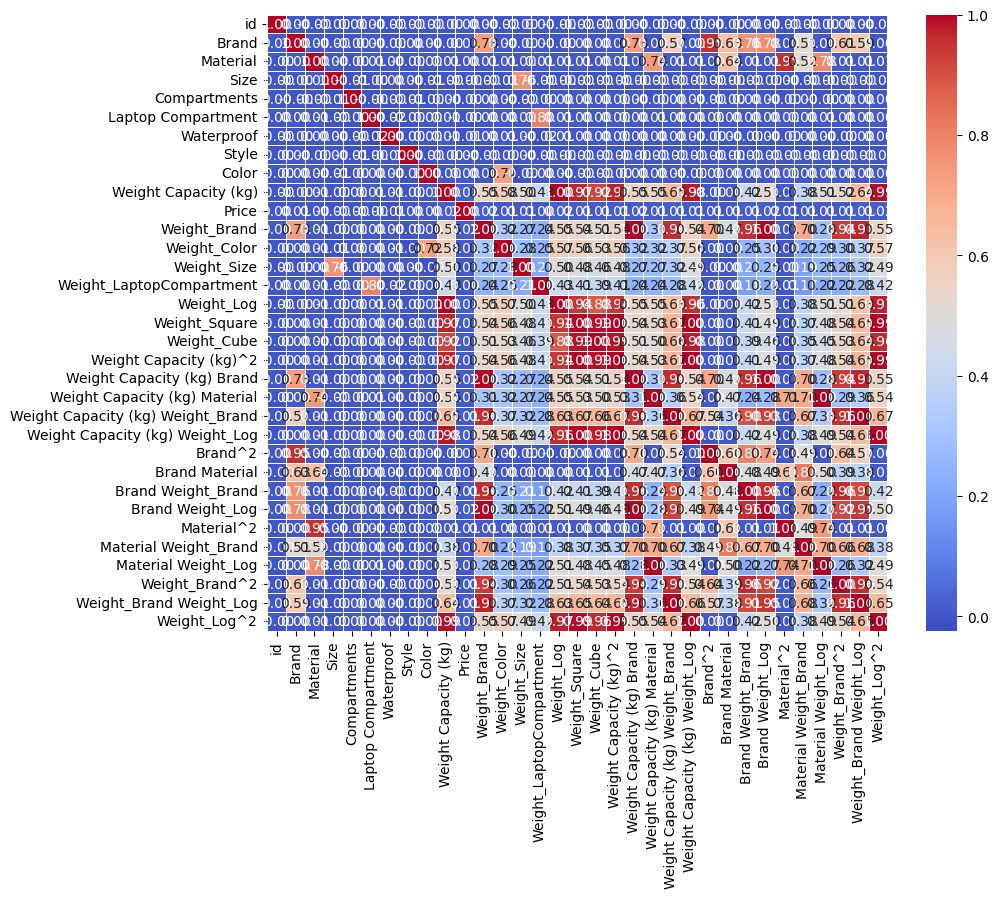

In [13]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

preprocessed_path = "/kaggle/working/processed_file.csv"

# Load dataset
preprocessed_data = pd.read_csv(preprocessed_path)

# Backup original weight
original_weight = preprocessed_data['Weight Capacity (kg)'].copy()

# Feature interactions
preprocessed_data['Weight_Brand'] = preprocessed_data['Weight Capacity (kg)'] * preprocessed_data['Brand']
preprocessed_data['Weight_Color'] = preprocessed_data['Weight Capacity (kg)'] * preprocessed_data['Color']
preprocessed_data['Weight_Size'] = preprocessed_data['Weight Capacity (kg)'] * preprocessed_data['Size']
preprocessed_data['Weight_LaptopCompartment'] = preprocessed_data['Weight Capacity (kg)'] * preprocessed_data['Laptop Compartment']

# Additional transformations
preprocessed_data['Weight_Log'] = np.log1p(original_weight)
preprocessed_data['Weight_Square'] = original_weight ** 2
preprocessed_data['Weight_Cube'] = original_weight ** 3

# Generate Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(preprocessed_data[['Weight Capacity (kg)', 'Brand', 'Material','Weight_Brand','Weight_Log']])
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out())

# Concatenate with original data
preprocessed_data = pd.concat([preprocessed_data, df_poly], axis=1)

# Remove duplicate columns
preprocessed_data = preprocessed_data.loc[:, ~preprocessed_data.columns.duplicated()]


# Apply StandardScaler only to existing columns
columns_to_scale = ['Weight Capacity (kg)', 'Brand', 'Material','Weight_Brand','Weight_Log']
columns_to_scale = [col for col in columns_to_scale if col in preprocessed_data.columns]  

scaler = StandardScaler()
preprocessed_data[columns_to_scale] = scaler.fit_transform(preprocessed_data[columns_to_scale])

# Save processed file
amplified_file = "/kaggle/working/amplified_file.csv"
preprocessed_data.to_csv(amplified_file, index=False)

# Reload and analyze correlation
amplified_data = pd.read_csv(amplified_file)
correlation_matrix = amplified_data.corr()

# Print correlation with Price
print(correlation_matrix['Price'])

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


# **Prepare amplified dataset for modeling: select key features, define target, and perform train-test split**


In [14]:
#ML
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score,f1_score, confusion_matrix

In [15]:
# Load your data
df = pd.read_csv("/kaggle/working/amplified_file.csv")

In [16]:
# Selected features
X_selected = df[['Weight_Log','Weight_Brand','Weight Capacity (kg)']]
y = df['Price']

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# **4.1-Decision Tree Regression Model with amplified features**

In [23]:
# Decision Tree Regression Model
tree = DecisionTreeRegressor(max_depth=3,min_samples_split=20,min_samples_leaf=20, random_state=25)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=20, min_samples_split=20,
                      random_state=25)

In [24]:
# Predict and evaluate
y_pred_tree = tree.predict(X_test)
print(f"Decision Tree R2 Score: {r2_score(y_test, y_pred_tree)}")
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_tree)}")
print(f"Decision Tree MAE: {mean_absolute_error(y_test, y_pred_tree)}")
print(f"Decision Tree RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree))}")
print(f"Decision Tree Explained Variance: {explained_variance_score(y_test, y_pred_tree)}")

Decision Tree R2 Score: 0.0007555483288426146
Decision Tree MSE: 1515.4700734211092
Decision Tree MAE: 33.6627852849725
Decision Tree RMSE: 38.929038948079736
Decision Tree Explained Variance: 0.0007782855511269116


In [25]:
# Load your data
df_test = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
df_test = preprocess_columns(df_test)
df_test = fix_medium(df_test)

# Apply necessary transformations
df_test['Weight_Brand'] = df_test['Weight Capacity (kg)'] * df_test['Brand']
original_weight = df_test['Weight Capacity (kg)'].copy()
df_test['Weight_Log'] = np.log1p(original_weight)

# Transform the test data using the same polynomial features
poly_features_test = poly.transform(df_test[['Weight Capacity (kg)', 'Brand', 'Material','Weight_Brand','Weight_Log']])

# Create a DataFrame for polynomial features for test data
df_poly_test = pd.DataFrame(poly_features_test, columns=poly.get_feature_names_out())

# Concatenate polynomial features with the original test data
df_test = pd.concat([df_test, df_poly_test], axis=1)

# Remove duplicate columns
df_test = df_test.loc[:, ~df_test.columns.duplicated()]

# Apply StandardScaler only to the columns you intend to scale
columns_to_scale = ['Weight Capacity (kg)', 'Brand', 'Material','Weight_Brand','Weight_Log']
columns_to_scale = [col for col in columns_to_scale if col in df_test.columns]

# Scaling the test data
scaler = StandardScaler()
df_test[columns_to_scale] = scaler.fit_transform(df_test[columns_to_scale])

# Save the modified test data
df_test.to_csv("test_file.csv", index=False)


test_path="/kaggle/working/test_file.csv"
analyze_csv_columns(test_path)
test_data = pd.read_csv("/kaggle/working/test_file.csv")
Z_test = test_data[['Weight_Log','Weight_Brand','Weight Capacity (kg)']]

# Make predictions on the test set
y_pred_tree = tree.predict(Z_test)

# Create a DataFrame with 'id' and the predicted 'Price'
output = pd.DataFrame({'id': df_test['id'], 'Price': y_pred_tree})

# Save the DataFrame to a CSV file
output.to_csv('test_predictions_DT_amplified.csv', index=False)

print("Output saved to 'test_predictions_DT_amplified.csv'")

Column: id
Distinct elements (200000): [300000 300001 300002 ... 499997 499998 499999]
Empty cells: 0
----------------------------------------
Column: Brand
Distinct elements (6): [ 0.60243674 -0.06375082 -1.39612594  1.93481186  1.2686243  -0.72993838]
Empty cells: 0
----------------------------------------
Column: Material
Distinct elements (5): [-0.53397053 -1.38486534  0.31692428  1.16781909  2.0187139 ]
Empty cells: 0
----------------------------------------
Column: Size
Distinct elements (3): [2. 1. 0.]
Empty cells: 0
----------------------------------------
Column: Compartments
Distinct elements (10): [ 2.  7.  9.  1.  8.  6.  5.  3. 10.  4.]
Empty cells: 0
----------------------------------------
Column: Laptop Compartment
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Waterproof
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Style
Distinct elements (4): [0. 2. 1. 3.]
Empty cel

# **4.2-XGBoost Model with amplified features**

In [207]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=75, random_state=42)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
print(f"XGBoost R2 Score: {r2_score(y_test, y_pred_xgb)}")
print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"XGBoost RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}")
print(f"XGBoost Explained Variance: {explained_variance_score(y_test, y_pred_xgb)}")

XGBoost R2 Score: 0.0013450371303498354
XGBoost MSE: 1514.0099806624403
XGBoost MAE: 33.65766711830477
XGBoost RMSE: 38.91028116915169
XGBoost Explained Variance: 0.0013457368149837334


In [208]:
test_path="/kaggle/working/test_file.csv"
analyze_csv_columns(test_path)
test_data = pd.read_csv("/kaggle/working/test_file.csv")
Z_test = test_data[['Weight_Log','Weight_Brand','Weight Capacity (kg)']]

# Make predictions on the test set
y_pred_XG = model.predict(Z_test)

# Create a DataFrame with 'id' and the predicted 'Price'
output = pd.DataFrame({'id': df_test['id'], 'Price': y_pred_XG})

# Save the DataFrame to a CSV file
output.to_csv('test_predictions_XG1_amplifiedt.csv', index=False)

print("Output saved to 'test_predictions_XG1_amplified.csv'")

Column: id
Distinct elements (200000): [300000 300001 300002 ... 499997 499998 499999]
Empty cells: 0
----------------------------------------
Column: Brand
Distinct elements (6): [ 0.60243674 -0.06375082 -1.39612594  1.93481186  1.2686243  -0.72993838]
Empty cells: 0
----------------------------------------
Column: Material
Distinct elements (5): [-0.53397053 -1.38486534  0.31692428  1.16781909  2.0187139 ]
Empty cells: 0
----------------------------------------
Column: Size
Distinct elements (3): [2. 1. 0.]
Empty cells: 0
----------------------------------------
Column: Compartments
Distinct elements (10): [ 2.  7.  9.  1.  8.  6.  5.  3. 10.  4.]
Empty cells: 0
----------------------------------------
Column: Laptop Compartment
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Waterproof
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Style
Distinct elements (4): [0. 2. 1. 3.]
Empty cel

# **4.3-LightGBM Model with amplified features**

In [26]:
# LightGBM Regression Model
import lightgbm as lgb

# Initialize the LightGBM regressor
model = lgb.LGBMRegressor(n_estimators=75, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = model.predict(X_test)

# Evaluate the model
print(f"LightGBM R2 Score: {r2_score(y_test, y_pred_lgbm)}")
print(f"LightGBM MSE: {mean_squared_error(y_test, y_pred_lgbm)}")
print(f"LightGBM MAE: {mean_absolute_error(y_test, y_pred_lgbm)}")
print(f"LightGBM RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lgbm))}")
print(f"LightGBM Explained Variance: {explained_variance_score(y_test, y_pred_lgbm)}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 3
[LightGBM] [Info] Start training from score 81.448481
LightGBM R2 Score: 0.00028137431207986285
LightGBM MSE: 1516.1892132980392
LightGBM MAE: 33.66475166600381
LightGBM RMSE: 38.93827440062078
LightGBM Explained Variance: 0.0003047793992486669


In [27]:
# Load and analyze test data, then make LightGBM predictions
test_path = "/kaggle/working/test_file.csv"
analyze_csv_columns(test_path)

# Load the test dataset
test_data = pd.read_csv(test_path)

# Select features for prediction
Z_test = test_data[['Weight_Log', 'Weight_Brand', 'Weight Capacity (kg)']]

# Make predictions on the test set using the trained LightGBM model
y_pred_lgbm = model.predict(Z_test)

# Create a DataFrame with 'id' and the predicted 'Price'
output = pd.DataFrame({'id': df_test['id'], 'Price': y_pred_lgbm})

# Save the predictions to a CSV file
output.to_csv('test_predictions_LGB_amplified.csv', index=False)

print("Output saved to 'test_predictions_LGB_amplified.csv'")


Column: id
Distinct elements (200000): [300000 300001 300002 ... 499997 499998 499999]
Empty cells: 0
----------------------------------------
Column: Brand
Distinct elements (6): [ 0.60243674 -0.06375082 -1.39612594  1.93481186  1.2686243  -0.72993838]
Empty cells: 0
----------------------------------------
Column: Material
Distinct elements (5): [-0.53397053 -1.38486534  0.31692428  1.16781909  2.0187139 ]
Empty cells: 0
----------------------------------------
Column: Size
Distinct elements (3): [2. 1. 0.]
Empty cells: 0
----------------------------------------
Column: Compartments
Distinct elements (10): [ 2.  7.  9.  1.  8.  6.  5.  3. 10.  4.]
Empty cells: 0
----------------------------------------
Column: Laptop Compartment
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Waterproof
Distinct elements (3): [0. 1. 2.]
Empty cells: 0
----------------------------------------
Column: Style
Distinct elements (4): [0. 2. 1. 3.]
Empty cel